In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

In [19]:
#read the data
#./dataset/ is a path. Copy and paste the path of the CSV file in your computer to read the data. 
food_consumption = pd.read_csv('./food_consumption.csv', index_col=0)
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [26]:
#filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

#Q-1) Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))   # Second way: print(be_consumption.consumption.mean())
print(np.median(be_consumption['consumption'])) # Second way: print(be_consumption.consumption.median())


#Q-2) Calculate mean and median consumption of USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


In [27]:
# Work with both countries together
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | 
                              (food_consumption['country'] == 'USA')]

# Q-3) Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64

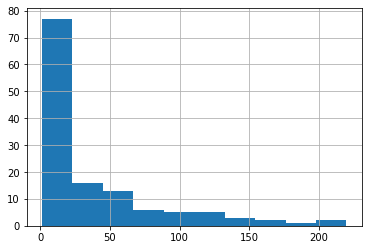

In [29]:
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

#Q-4)Plot the histogram of co2_emission for rice
rice_consumption['co2_emission'].hist();

#Q-5) Calculate mean and median of co2_emission with .agg()
rice_consumption['co2_emission'].agg([np.mean, np.median])

In [30]:
#Q-6) Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 6)))

#You only need to fill in the missing part.

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [34]:
#Q-7) Calculate the variance and standard deviation of co2_emission for food_categories
food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std])

,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


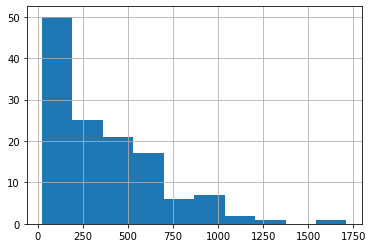

In [45]:
#Q-8) Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category']=='beef']['co2_emission'].hist();

In [46]:
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [47]:
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country > upper) | (emissions_by_country < lower)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
